<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Import-Libraries" data-toc-modified-id="Import-Libraries-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Import Libraries</a></span></li><li><span><a href="#Functions-to-produce-output" data-toc-modified-id="Functions-to-produce-output-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Functions to produce output</a></span></li><li><span><a href="#Data-Understanding" data-toc-modified-id="Data-Understanding-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Data Understanding</a></span><ul class="toc-item"><li><span><a href="#List-of-problems" data-toc-modified-id="List-of-problems-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>List of problems</a></span></li><li><span><a href="#Correlation-between-features" data-toc-modified-id="Correlation-between-features-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>Correlation between features</a></span></li><li><span><a href="#Numeric-features-vs-Price-m2" data-toc-modified-id="Numeric-features-vs-Price-m2-3.3"><span class="toc-item-num">3.3&nbsp;&nbsp;</span>Numeric features vs Price m2</a></span></li><li><span><a href="#Categorical-features-vs-Price-m2" data-toc-modified-id="Categorical-features-vs-Price-m2-3.4"><span class="toc-item-num">3.4&nbsp;&nbsp;</span>Categorical features vs Price m2</a></span></li><li><span><a href="#Plot-locations-in-a-map" data-toc-modified-id="Plot-locations-in-a-map-3.5"><span class="toc-item-num">3.5&nbsp;&nbsp;</span>Plot locations in a map</a></span></li></ul></li><li><span><a href="#Import,-Clean,-Transform-Dataset" data-toc-modified-id="Import,-Clean,-Transform-Dataset-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Import, Clean, Transform Dataset</a></span></li><li><span><a href="#Compare-models-and-choose-best" data-toc-modified-id="Compare-models-and-choose-best-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Compare models and choose best</a></span><ul class="toc-item"><li><span><a href="#Chosen-Features" data-toc-modified-id="Chosen-Features-5.1"><span class="toc-item-num">5.1&nbsp;&nbsp;</span>Chosen Features</a></span></li><li><span><a href="#Optimize-Tuning-for-LightGBM-model" data-toc-modified-id="Optimize-Tuning-for-LightGBM-model-5.2"><span class="toc-item-num">5.2&nbsp;&nbsp;</span>Optimize Tuning for LightGBM model</a></span></li></ul></li><li><span><a href="#Explain-Machine-Learning-Model" data-toc-modified-id="Explain-Machine-Learning-Model-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Explain Machine Learning Model</a></span><ul class="toc-item"><li><span><a href="#Feature-Importance" data-toc-modified-id="Feature-Importance-6.1"><span class="toc-item-num">6.1&nbsp;&nbsp;</span>Feature Importance</a></span></li><li><span><a href="#Feature-patterns" data-toc-modified-id="Feature-patterns-6.2"><span class="toc-item-num">6.2&nbsp;&nbsp;</span>Feature patterns</a></span></li><li><span><a href="#Explain-example" data-toc-modified-id="Explain-example-6.3"><span class="toc-item-num">6.3&nbsp;&nbsp;</span>Explain example</a></span><ul class="toc-item"><li><span><a href="#Original-example" data-toc-modified-id="Original-example-6.3.1"><span class="toc-item-num">6.3.1&nbsp;&nbsp;</span>Original example</a></span></li><li><span><a href="#After-data-manipulation" data-toc-modified-id="After-data-manipulation-6.3.2"><span class="toc-item-num">6.3.2&nbsp;&nbsp;</span>After data manipulation</a></span></li></ul></li></ul></li></ul></div>

## Import Libraries

In [299]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import random
import pygeohash as gh
import geohash2
from fuzzywuzzy import process, fuzz
import geopy
from geopy.distance import geodesic
import time
import shap
import operator
import math
# load JS visualization code to notebook
shap.initjs()
import gc
#plot in a map
import folium
from folium.plugins import MarkerCluster
from folium import Choropleth, Circle, Marker
# Models
from sklearn.linear_model import LinearRegression, SGDRegressor, Ridge, Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor,\
ExtraTreesRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from xgboost import XGBRegressor
from catboost import CatBoostRegressor
from sklearn.kernel_ridge import KernelRidge
from sklearn.linear_model import ElasticNet
import lightgbm
from lightgbm import LGBMRegressor
# Model selection
from sklearn.feature_selection import VarianceThreshold
from sklearn import metrics
from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.pipeline import Pipeline
from sklearn.feature_selection import SelectFromModel
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedShuffleSplit, cross_val_score, KFold
from sklearn.model_selection import cross_validate, ShuffleSplit, cross_val_score, GridSearchCV
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, fbeta_score #To evaluate our model
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
# Hyperparameter tuning and optimization
from hyperopt import hp, fmin, tpe, Trials, STATUS_OK
from hyperopt.pyll import scope
from sklearn.feature_selection import RFE, RFECV
#plot
import matplotlib.pyplot as plt
import seaborn as sns #Graph library that use matplot in background
# plotly libraries
import cufflinks as cf
cf.go_offline()
import plotly.offline as py 
py.init_notebook_mode(connected=True) # this code, allow us to work with offline plotly version
import plotly.graph_objs as go # it's like "plt" of matplot
# these two lines allow your code to show up in a notebook
from plotly.offline import init_notebook_mode, iplot
init_notebook_mode()
import widgetsnbextension
from IPython.display import display, HTML
# normality tests
from scipy import stats
#display full dataframe
pd.set_option("display.max_rows", None)
pd.set_option("display.max_columns", None)

## Functions to produce output

In [266]:
'''Set a seed for reproducibility'''
seed = 1

'''Set path where all data files are located'''
path = 'C:/Users/Nikitas/Desktop/Nikitas/other_pet_projects/recognyte/'

'''Create load data function to easy import all necessary'''
def LoadData(path,file):
    """Load Data from defined directory.
    Output is initial data dataframe."""
    data = pd.read_csv(path + file + '.csv')
    print ("Data is loaded!")
    print ("Data: ",data.shape[0],"observations, and ",data.shape[1],"features")
    #
    return data

'''Create function for providing summary statistics in a table'''
def resumetable(df):
    print(f"Dataset Shape: {df.shape}")
    summary = pd.DataFrame(df.dtypes,columns=['dtypes'])
    summary = summary.reset_index()
    summary['Name'] = summary['index']
    summary = summary[['Name','dtypes']]
    summary['Missing'] = df.isnull().sum().values    
    summary['Uniques'] = df.nunique().values
    summary['Average'] = df.mean().values
    summary['Median'] = df.median().values
    summary['Maximum'] = df.max().values
    summary['Minimum'] = df.min().values
    summary['Standard Deviation'] = df.std().values

    for name in summary['Name'].value_counts().index:
        summary.loc[summary['Name'] == name, 'Entropy'] = round(stats.entropy(df[name].value_counts(normalize=True), base=2),2) 

    return summary

'''Create function for data understanding to assess if there are features with missing values'''
def MissingData(df,thres):
    """
    Define a dataframe with missing values and their
    respective percentage and drop columns based on that percentage
    param df:
        dataframe to evaluate upon missing data
    return:
        return dataframe dropped columns decided by threshold
    """
    total = df.isnull().sum().sort_values(ascending = False)
    percent = (df.isnull().sum()/df.isnull().count()).sort_values(ascending = False)
    missing_data = pd.concat([total,percent], axis = 1, keys = ['Total', 'Percent'])
    print(missing_data.head(20))
    c=df.dropna(thresh=len(df)*thres, axis=1)
    print('Threshold is: ' + str(thres))
    print(f"We dropped {df.shape[1]-c.shape[1]} features in the combined set")
    return c

'''Clean greek localites dataframe by splitting lat long to separate columns'''
def CleanGreekLocalities(df):
    """
    param df:
        dataframe to clean variable pnt
    return:
        return dataframe with separate Lat Long features
    """
    df = df.copy()
    df['pnt'] = df['pnt'].map(lambda x: x.strip('POINT'))
    df['pnt'] = df['pnt'].str.replace(r')', '')
    df['pnt'] = df['pnt'].str.replace(r'(', '')
    df['pnt'] = df['pnt'].apply(lambda x: x.lstrip())
    df[['Lat','Long']] = df['pnt'].apply(lambda x: pd.Series(str(x).split(" ")))
    return df

'''Create an automated way to fix property feature'''
def PropertyFix(asking_data):
    """
    Create a matching similarity algorithm which decides which of the possible names in prop_type feature need to be renamed to the closest names with higher percentage of popularity in the dataframe
    param asking_data:
        dataframe to clean variable prop_type
    return:
        return dataframe with separate Lat Long features
    """
    unique_property = asking_data['prop_type'].unique().tolist()
    #Create tuples names and the score
    score_sort = [(x,) + i
                 for x in unique_property 
                 for i in process.extract(x, unique_property, scorer=fuzz.token_sort_ratio)]
    # mispelled property types appeared. 
    proptype_valcounts = asking_data['prop_type'].value_counts(normalize=True)
    #rename columns properly
    proptype_valcounts = proptype_valcounts.rename_axis('property').reset_index()
    proptype_valcounts = proptype_valcounts.rename(columns={"prop_type": "percentage"})
    #Create a dataframe from the tuples
    similarity_sort = pd.DataFrame(score_sort, columns=['property','match_sort','score_sort'])
    # merge with percentage 
    similarity_sort = pd.merge(similarity_sort,proptype_valcounts,on = 'property',how = 'left')
    #
    similarity_sort['sorted_property'] = np.minimum(similarity_sort['property'], similarity_sort['match_sort'])
    similarity_sort['sorted_property'] = similarity_sort['sorted_property'].str.lower()
    similarity_sort
    #
    high_score_sort = similarity_sort[(similarity_sort['score_sort'] >= 50) &((similarity_sort['percentage'] >= 0.01))]
    # left join prop type to the proper name cleaned and lowered.
    high_score_sort = high_score_sort[["match_sort","sorted_property"]].drop_duplicates()
    high_score_sort = high_score_sort.rename(columns={"match_sort": "prop_type", "sorted_property": "property"})
    # fix mispelled values.
    asking_data = pd.merge(asking_data,high_score_sort, on = "prop_type", how = "left")
    return asking_data

'''Convert all text fields containing numeric values to floats'''
def text_to_float(text):
  """Convert all cases where a numeric field is in text type and instead of . there is ,
     Output is the field transformed in correct type ie float
  """
       # find position for comma and dot and replace accordingly
       #  so that float can be applied to value
  t = text
  dot_pos = t.rfind('.')
  comma_pos = t.rfind(',')
  dash_pos = t.rfind('-')
  lowdash_pos = t.rfind('_')

  if comma_pos > dot_pos:
    t = t.replace(".", "")
    t = t.replace(",", ".")
  elif dash_pos > dot_pos :
    t = t.replace("-","")
  elif lowdash_pos > dot_pos :
    t = t.replace("_","")
  else:
    t = t.replace(",", "")

  return(float(t))

'''Convert defined categorical columns to one hot encoded ones'''
def one_hot_encoder(df, ohe_cols=[]):
    '''
    One-Hot Encoder function
    '''
    print('Creating OHE features..\nOld df shape:{}'.format(df.shape))
    df = pd.get_dummies(df, columns=ohe_cols)
    print('New df shape:{}'.format(df.shape))
    return df

'''Decode hash code to lat long coordinates using geohash library'''
def gh_decode(hash):

    lat, lon = geohash2.decode(hash)

    return pd.Series({"latitude":lat, "longitude":lon})

'''Calculate distance between two given locations with lat long coordinates'''
def calculate_distance(location, set_coord):
    """ take two tuples of latitude and longitude and
    calculate distance in km"""
    locations = []

    distance = geodesic(location, set_coord)
    locations.append([distance.kilometers])
    df = pd.DataFrame(locations, columns=['Distance'])
    
    return df['Distance'][0]

'''Find closest point between a given location and a list of locations'''
def closest_point(location, df):
    """ take a tuple of latitude and longitude and 
        compare to a dictonary of locations where
        key = location name and value = (lat, long)
        returns tuple of (closest_location , distance) """
    locations = []
    for i in range(len(df)):
        print(i)
        set_coord = {float(df['Lat'][i]),float(df['Long'][i])}
        distance = geodesic(location, set_coord)
        locations.append([df['Locality'][i],distance.kilometers])
    df = pd.DataFrame(locations, columns=['Locality', 'Distance'])
    df =  df[df['Distance'] == min(df['Distance'])]
    return df['Locality'].values,df['Distance'].values

'''All feature engineering steps happen inside this function'''
def Data_Preparation(df):
    """
    param df:
        main dataframe,asking_data, with all necessary features and target variable to develop predictive model.
    return:
        return main dataframe with target variable and features
    """
    start = time.time()
    #
    df = PropertyFix(df)
    #apply function to convert to float all pricing fields
    df["price"] = df["price"].apply(text_to_float)
    df["price_m2"] = df["price_m2"].apply(text_to_float)
    #
    # Create new var price_m2 x area
    df["price new"] = df["price_m2"] * df["area"] 
    # keep only numeric values for bedroom feature
    df['bedrooms'] = df['bedrooms'].str.replace(r'\D', '')
    # create one hot encoding for special cases in floor feature
    special_cases_floor = ['Ground floor', 'Mezzanine', 'Basement', 'Semi-basement']
    #
    for case in special_cases_floor:
        df[case + ' ohe'] = np.where((df['floor'] == case), 1,0)
        df['floor'] = np.where((df['floor'] == case), 1,df['floor'])
    # impute all cases where floor = 0 to floor = 1 as there is no house without any floors even if it is ground floor
    df['floor'] = np.where((df['floor'] == 0), 1,df['floor'])
    # convert columns to numeric
    df[["price", "price_m2","bedrooms", "floor"]] = df[["price", "price_m2","bedrooms", "floor"]].apply(pd.to_numeric)
    # create features which will combine information from area , number of bedrooms and number of floors
    #bedrooms per floor
    df['bedrooms_per_floor'] = df['bedrooms'] / df['floor']
    # area per floor
    df['area_per_floor'] = df['area'] / df['floor']
    # area per bedroom
    df['area_per_bedroom'] = df['area'] / df['bedrooms']
    #convert infinity values to na
    df = df.replace(np.inf, np.nan)
    # because some properties have no bedrooms need to impute calculated features with filling nas to 0 
    df = df.fillna(0)
    # Convert geohash code to lat long
    df['geohash_location'] = df.apply(lambda rec: gh.decode(rec['geohash']), axis=1)
    df = df.join(df["geohash"].apply(gh_decode))

    # define specific points of reference where distance will be calculated as a proxy for price of the property
    athens = (37.983810, 23.727539)
    skg = (40.629269, 22.947412)
    crete_her = (35.341846, 25.148254)
    crete_cha = (35.513828, 24.018038)
    alexandr = (40.849136, 25.879326)
    glyfada = (37.865044, 23.755045)
    kifisia = (38.07438, 23.81106)
    ioannina = (39.665028, 20.853746)
    mykonos= (37.450001, 25.350000)
    kalamata = (37.036598, 22.114401)
    volos = (39.366669, 22.933332)
    patra = (38.246639,21.734573)
    komotini = (41.122440,25.406557)
    nafplio = (37.56829, 22.80528)
    kavala = (40.93959, 24.40687)
    chalkidiki = (40.369500, 23.287085)
    rodos = (36.1667,28.0000)
    zakinthos = (37.7882,20.8988)
    paros = (37.0453,25.2126)
    argos = (37.642509,22.723160)

    # calculate distance features
    df['athens_distance'] = df.apply(lambda x: calculate_distance((x['latitude'],x['longitude']),athens), axis = 1)
    df['skg_distance'] = df.apply(lambda x: calculate_distance((x['latitude'],x['longitude']),skg), axis = 1)
    df['crete_her_distance'] = df.apply(lambda x: calculate_distance((x['latitude'],x['longitude']),crete_her), axis = 1)
    df['crete_cha_distance'] = df.apply(lambda x: calculate_distance((x['latitude'],x['longitude']),crete_cha), axis = 1)
    df['alexandr_distance'] = df.apply(lambda x: calculate_distance((x['latitude'],x['longitude']),alexandr), axis = 1)
    df['glyfada_distance'] = df.apply(lambda x: calculate_distance((x['latitude'],x['longitude']),glyfada), axis = 1)
    df['kifisia_distance'] = df.apply(lambda x: calculate_distance((x['latitude'],x['longitude']),kifisia), axis = 1)
    df['ioannina_distance'] = df.apply(lambda x: calculate_distance((x['latitude'],x['longitude']),ioannina), axis = 1)
    df['alexandr_distance'] = df.apply(lambda x: calculate_distance((x['latitude'],x['longitude']),alexandr), axis = 1)
    df['mykonos_distance'] = df.apply(lambda x: calculate_distance((x['latitude'],x['longitude']),mykonos), axis = 1)
    df['kalamata_distance'] = df.apply(lambda x: calculate_distance((x['latitude'],x['longitude']),kalamata), axis = 1)
    df['volos_distance'] = df.apply(lambda x: calculate_distance((x['latitude'],x['longitude']),volos), axis = 1)
    df['patra_distance'] = df.apply(lambda x: calculate_distance((x['latitude'],x['longitude']),patra), axis = 1)
    df['komotini_distance'] = df.apply(lambda x: calculate_distance((x['latitude'],x['longitude']),komotini), axis = 1)
    df['nafplio_distance'] = df.apply(lambda x: calculate_distance((x['latitude'],x['longitude']),nafplio), axis = 1)
    df['kavala_distance'] = df.apply(lambda x: calculate_distance((x['latitude'],x['longitude']),kavala), axis = 1)
    df['chalkidiki_distance'] = df.apply(lambda x: calculate_distance((x['latitude'],x['longitude']),chalkidiki), axis = 1)
    df['rodos_distance'] = df.apply(lambda x: calculate_distance((x['latitude'],x['longitude']),rodos), axis = 1)
    df['zakinthos_distance'] = df.apply(lambda x: calculate_distance((x['latitude'],x['longitude']),zakinthos), axis = 1)
    df['paros_distance'] = df.apply(lambda x: calculate_distance((x['latitude'],x['longitude']),paros), axis = 1)
    df['argos_distance'] = df.apply(lambda x: calculate_distance((x['latitude'],x['longitude']),argos), axis = 1)
    # generate binary values using get_dummies
    df = one_hot_encoder(df, ohe_cols=['property'])
    # convert has parking to binary numeric variable
    df['has_parking'] = np.where((df['has_parking'] == 'TRUE'), 1,0)
    # create ohe for specific cases of cunstruction year feature and then convert to numeric
    df['under construction ohe'] = np.where((df['construction_year'] == 'Under construction'), 1,0)
    df['unknown ohe'] = np.where((df['construction_year'] == '-'), 1,0)
    # fix outlier values for construction year so that feature will be imputed to median value
    df['construction_year'] = np.where((df['construction_year'] == 'Under construction'), '-',df['construction_year'])
    df['construction_year'] = np.where((df['construction_year'] == '-'), '',df['construction_year'])
    df['construction_year'] = np.where((df['construction_year'] == ''), '0',df['construction_year'])
    df['construction_year'] = df['construction_year'].apply(pd.to_numeric)
    # if construction _year  = 0 then replace it with nan value
    df['construction_year'] = df['construction_year'].replace(0, np.nan)
    # impute feature construction year with mean value for all those values where construction year is missing or it is not defined.
    df['construction_year']= df['construction_year'].fillna(df['construction_year'].median())
    # create variable number of years since building
    df['house_age'] = 2021.0-df['construction_year']
    # rename index to id
    df = df.rename(columns={'Unnamed: 0': "id"})
    #log transform the target:
    df['log_price_m2'] = np.log1p(df['price_m2'])
    # Because we have applied log transformation to make the target distribution more normal, we will delete those observations which are more than 3 standard deviations from the mean.
    om_y = out_iqr(df['log_price_m2'], k=3.0)
    # create Pandas Series with define indexes
    s2= pd.Series(om_y)
    df = df[s2.values]
    # print new length of df 
    print("New df has length: ")
    print(len(df))
    # select certain columns
    df = df[['id','price_m2','log_price_m2',
             'latitude','longitude',
                         'area',
                     'bedrooms',
                        'floor',
            'bedrooms_per_floor',
             'area_per_floor',
             'area_per_bedroom',
                  'has_parking',
                  'house_age',
            'construction_year',
             'Ground floor ohe',
                'Mezzanine ohe',
                 'Basement ohe',
            'Semi-basement ohe',
              'athens_distance',
                 'skg_distance',
            'crete_her_distance',
            'crete_cha_distance',
            'alexandr_distance',
             'glyfada_distance',
            'ioannina_distance',
             'mykonos_distance',
            'kalamata_distance',
               'volos_distance',
               'patra_distance',
            'komotini_distance',
             'nafplio_distance',
             'kavala_distance',
             'chalkidiki_distance',
             'rodos_distance',
             'zakinthos_distance',
             'paros_distance',
             'argos_distance',
           'property_apartment',
             'prop_type',
         'property_studio flat',
               'property_villa',
       'under construction ohe',
                  'unknown ohe']].drop_duplicates()
    end = time.time()
    print("Total Time for Data Preparation is: ")
    print((end - start)/60)
    return df



'''Choose certain columns for fitting ML model'''
def ChooseColumns(df):
    # select certain columns
    df = df[['id','log_price_m2',
                         'area',
                     'bedrooms',
                        'floor',
            'bedrooms_per_floor',
             'area_per_floor',
             'area_per_bedroom',
                  'has_parking',
                  'house_age',
            'construction_year',
             'Ground floor ohe',
                'Mezzanine ohe',
                 'Basement ohe',
            'Semi-basement ohe',
              'athens_distance',
                 'skg_distance',
            'crete_her_distance',
            'crete_cha_distance',
            'alexandr_distance',
             'glyfada_distance',
            'ioannina_distance',
             'mykonos_distance',
            'kalamata_distance',
               'volos_distance',
               'patra_distance',
            'komotini_distance',
             'nafplio_distance',
             'kavala_distance',
             'chalkidiki_distance',
             'rodos_distance',
             'zakinthos_distance',
             'paros_distance',
             'argos_distance',
           'property_apartment',
         'property_studio flat',
               'property_villa',
       'under construction ohe',
                  'unknown ohe']].drop_duplicates()
    return df


'''Convert main dataframe to train test split ready to train/validate model'''
def ModelCreation(df,testsize,target,selected_features):
    """
    Return 4 dataframes for train and test
    param df:
        dataframe to split into train test
    return:
        return 4 frames
    """
    #set x and y
    y=df[target].values
    x=df.drop([target,'id'], axis=1)
    x= x[selected_features]
    # train test split
    x_train, x_test, y_train, y_test = train_test_split(x, y,test_size = testsize, random_state=42)
    # Robust Scaling transform
    pipeline = Pipeline([
        ('robust', RobustScaler())
    ])
    x_train = pipeline.fit_transform(x_train)
    x_test = pipeline.transform(x_test)
    
    return x_train, x_test, y_train, y_test


'''Shuffle data and return cross validation scores'''
def cv_results_print(model,X_train,y_train,test_size,seed):
  """
  Return 4 dataframes for train and test
  param model:
     model to perform cross validation and output results
   param X_train:
     X dataframe
   param y_train:
     y dataframe
   param test_size:
     size for test cross validation
  return:
     return rmse and mae
  """
  start = time.time()
  cv = ShuffleSplit(n_splits=10, test_size=test_size, random_state=seed)
  results_rmse = cross_val_score(model, X_train, y_train, cv=cv, n_jobs=-1, scoring='neg_mean_squared_error')
  results_mae = cross_val_score(model, X_train, y_train, cv=cv, n_jobs=-1, scoring='neg_mean_absolute_error')
  rmse = np.sqrt(-results_rmse).mean()
  mae = np.abs(-results_mae).mean()
    
  model_name = model.__class__.__name__
  model_params = model.get_params()
  print('Model: {}'.format(model_name))
  print('Model Parameters: {}'.format(model_params))
  print('5 Fold CV RMSE: {:.4f}'.format(rmse))
  print('5 Fold CV MAE: {:.4f}'.format(mae))
  print('Computation Time: {:.2f}'.format(time.time() - start))
  return rmse,mae


def out_std(s, nstd=3.0, return_thresholds=False):
    """
    Return a boolean mask of outliers for a series
    using standard deviation, works column-wise.
    param nstd:
        Set number of standard deviations from the mean
        to consider an outlier
    :type nstd: ``float``
    param return_thresholds:
        True returns the lower and upper bounds, good for plotting.
        False returns the masked array 
    :type return_thresholds: ``bool``
    """
    data_mean, data_std = s.mean(), s.std()
    cut_off = data_std * nstd
    lower, upper = data_mean - cut_off, data_mean + cut_off
    if return_thresholds:
        return lower, upper
    else:
        return [False if x < lower or x > upper else True for x in s]

def out_iqr(s, k=1.5, return_thresholds=False):
    """
    Return a boolean mask of outliers for a series
    using interquartile range, works column-wise.
    param k:
        some cutoff to multiply by the iqr
    :type k: ``float``
    param return_thresholds:
        True returns the lower and upper bounds, good for plotting.
        False returns the masked array 
    :type return_thresholds: ``bool``
    """
    # calculate interquartile range
    q25, q75 = np.percentile(s, 25), np.percentile(s, 75)
    iqr = q75 - q25
    # calculate the outlier cutoff
    cut_off = iqr * k
    lower, upper = q25 - cut_off, q75 + cut_off
    if return_thresholds:
        return lower, upper
    else: # identify outliers
        return [False if x < lower or x > upper else True for x in s]
    
    
def CheckDistribution(df,feature):
    """
    Return a describe table with main statistics and distribution plot for the given feature.
    param df:
        Set dataframe where feature is located.
    param feature:
        Given feature which will be checked upon distribution and main statistics.
    """
    print(df[feature].describe())
    plt.figure(figsize=(9, 8))
    sns.distplot(df[feature], color='g', bins=100, hist_kws={'alpha': 0.4});
    
def CheckNormality(df,feature):
    """
    Return the output of the normality test of Wilk-Shapiro.
    param df:
        Set dataframe where feature is located.
    param feature:
        Given feature which will be checked upon the normality test.
    """
    stat, p = stats.shapiro(df[feature])

    print("Shapiro stat:", stat)
    print("P-value: ", p)
    if p >= .01:
        print('Normal Distribution')
    else:
        print("Non-Normal Distribution")     
    
def remove_collinear_features(x, threshold):
    '''
    Objective:
        Remove collinear features in a dataframe with a correlation coefficient
        greater than the threshold. Removing collinear features can help a model 
        to generalize and improves the interpretability of the model.

    Inputs: 
        x: features dataframe
        threshold: features with correlations greater than this value are removed

    Output: 
        dataframe that contains only the non-highly-collinear features
    '''

    # Calculate the correlation matrix
    corr_matrix = x.corr()
    iters = range(len(corr_matrix.columns) - 1)
    drop_cols = []

    # Iterate through the correlation matrix and compare correlations
    for i in iters:
        for j in range(i+1):
            item = corr_matrix.iloc[j:(j+1), (i+1):(i+2)]
            col = item.columns
            row = item.index
            val = abs(item.values)

            # If correlation exceeds the threshold
            if val >= threshold:
                # Print the correlated features and the correlation value
                #print(col.values[0], "|", row.values[0], "|", round(val[0][0], 2))
                drop_cols.append(col.values[0])

    # Drop one of each pair of correlated columns
    drops = set(drop_cols)
    x = x.drop(columns=drops)
    print('Removed Columns {}'.format(drops))
    return x

#dataframe from upper step and number of best variables to output
def variableselection_continuous(df,best,target,features_to_select):

      start = time.time()

      def XyCreationCont(df):

             y = df[target].ravel()
             y = np.array(y).astype(float)
             X = pd.DataFrame(df.drop([target,'id'], axis=1))
             return X,y

      X,y = XyCreationCont(df)
# =============================================================================
#        #Remove zero variance features
# =============================================================================
      print('Remove Zero Variance Features..')
      sel = VarianceThreshold(threshold=0)
      sel.fit(X)  # fit finds the features with zero variance
      zerovar_support = sel.get_support()
    
    
# =============================================================================
#        #Remove missing
# =============================================================================
      print('Remove Missing..')
      for col in X.columns:
             if X[col].isnull().sum()/X.shape[0] > 0.9:
                    print(col)
                    del X[col]
# =============================================================================
#        #Remove low variance features
# =============================================================================       
      for col in X.columns:
             if X[col].nunique()==1:
                    print(col)
                    del X[col]
# =============================================================================
#        #Pearson Correlation
# =============================================================================
      print('Pearson Correlation..')

      def cor_selector(X, y):
          cor_list = []
          # calculate the correlation with y for each feature
          for i in X.columns.tolist():
              cor = np.corrcoef(X[i], y)[0, 1]
              cor_list.append(cor)
          # replace NaN with 0
          cor_list = [0 if np.isnan(i) else i for i in cor_list]
          # feature name
          cor_feature = X.iloc[:,np.argsort(np.abs(cor_list))[-features_to_select:]].columns.tolist()
          # feature selection? 0 for not select, 1 for select
          cor_support = [True if i in cor_feature else False for i in feature_name]
          return cor_support, cor_feature


      feature_name = X.columns.tolist()     

      cor_support, cor_feature = cor_selector(X, y)

# =============================================================================
#        #Wrapper RFE selector
# =============================================================================
      print('RFE selector..')
      X_norm = MinMaxScaler().fit_transform(X)
      rfe_selector = RFE(estimator=LinearRegression(), n_features_to_select=features_to_select, step=120, verbose=5)
      rfe_selector.fit(X_norm, y)

      rfe_support = rfe_selector.get_support()
      rfe_feature = X.loc[:,rfe_support].columns.tolist()
      print(str(len(rfe_feature)), 'selected features')

# =============================================================================
#        #Light GBM
# =============================================================================
      print('Light GBM ..')

      lgbc=LGBMRegressor(boosting_type='gbdt', 
       num_leaves=31, 
       max_depth=6, 
       learning_rate=0.08, 
       n_estimators=300, colsample_bytree=0.2,
                  reg_alpha=3, reg_lambda=1, min_split_gain=0.01, min_child_weight=30)

      embeded_lgb_selector = SelectFromModel(lgbc)
      embeded_lgb_selector.fit(X, y)

      embeded_lgb_support = embeded_lgb_selector.get_support()
      embeded_lgb_feature = X.loc[:,embeded_lgb_support].columns.tolist()
      print(str(len(embeded_lgb_feature)), 'selected features')
# =============================================================================
#        #Select top x features via voting mechanism
# =============================================================================
      # put all selection together
      feature_selection_df = pd.DataFrame({'Feature':feature_name, 'Zero Variance':zerovar_support, 'Pearson':cor_support,  'RFE':rfe_support,
                                           'LightGBM':embeded_lgb_support})
      # count the selected times for each feature
      feature_selection_df['Total'] = np.sum(feature_selection_df, axis=1)
      # display the top 100
      feature_selection_df = feature_selection_df.sort_values(['Total','Feature'] , ascending=False)
      feature_selection_df.index = range(1, len(feature_selection_df)+1)

      best_features = feature_selection_df.head(best)
      best_features = list(best_features['Feature'])
    # pabrint best features
      print(best_features)
      Xbest = X[best_features]

        
      # remove uncorrelated features 
      Xbest = remove_collinear_features(Xbest,0.85)
        
        
      end = time.time()
      print((end - start)/60)

      return Xbest


'''Function to plot scatter plot'''
def scatter_plot(x, y, title, xaxis, yaxis, size, c_scale):
    trace = go.Scatter(
    x = x,
    y = y,
    mode = 'markers',
    marker = dict(color = y, size = size, showscale = True, colorscale = c_scale))
    layout = go.Layout(hovermode= 'closest', title = title, xaxis = dict(title = xaxis), yaxis = dict(title = yaxis))
    fig = go.Figure(data = [trace], layout = layout)
    return iplot(fig)

## Data Understanding

Dataframe has a couple of issues which need either data cleaning or imputation in order to produce value out of the dataframe. A couple of the underlined issues can be found as follows:


### List of problems

- __1)__ Wrong data type (price, price_m2,lat,long,bedrooms,floor,construction year) should be numeric (float).
- __2)__ price,price_m2 have values which contaminate the true values like -,_ etc. Need to clean all possible cases and convert to the true value.
- __3)__ prop_type feature has mispelled values of the three main types of properties(Apartment,Studio Flat,Villa). Need to convert to the proper value.
- __4)__ lat, long have many observations not completed. Need to complete to the best possible accuracy from geohash conversion to lat, long.
- __5)__ bedrooms variable has non numeric values need to be converted to true numeric ones after data cleaning.
- __6)__ floor has non numeric values need to be converted to numeric ones after data cleaning.
- __7)__ parking has both TRUE FALSE and yes no values. Need to have consistent binary values,ideally numeric ones.
- __8)__ empty and "Under construction" values in construction_year feature. Need to impute it with a numeric value instead. Possibly create dummy variables for those special cases.
- __9)__ 47 observations with Nan in location feature. Can either be omitted or imputed by the creation of a new feature.
- __10)__ price and price_m2 are essentially the same variable so it is best not to include price feature for predicting price_m2.

In [267]:
#Load data
asking_data = LoadData(path,'asking_data')
#Clean and Prepare data
prepared_data = Data_Preparation(asking_data)

Data is loaded!
Data:  1979 observations, and  13 features
Creating OHE features..
Old df shape:(1979, 45)
New df shape:(1979, 47)
New df has length: 
1977
Total Time for Data Preparation is: 
0.5085150917371114


In [271]:
prepared_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1977 entries, 0 to 1978
Data columns (total 43 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   id                      1977 non-null   int64  
 1   price_m2                1977 non-null   float64
 2   log_price_m2            1977 non-null   float64
 3   latitude                1977 non-null   object 
 4   longitude               1977 non-null   object 
 5   area                    1977 non-null   float64
 6   bedrooms                1977 non-null   int64  
 7   floor                   1977 non-null   int64  
 8   bedrooms_per_floor      1977 non-null   float64
 9   area_per_floor          1977 non-null   float64
 10  area_per_bedroom        1977 non-null   float64
 11  has_parking             1977 non-null   int32  
 12  house_age               1977 non-null   float64
 13  construction_year       1977 non-null   float64
 14  Ground floor ohe        1977 non-null   

In [272]:
prepared_data_num = prepared_data.select_dtypes(include = ['float64','int64','uint8','int32'])

In [274]:
resumetable(prepared_data_num)

Dataset Shape: (1977, 40)


Name   dtypes  Missing  Uniques      Average  \
0                       id    int64        0     1977   988.474962   
1                 price_m2  float64        0      868  1241.269600   
2             log_price_m2  float64        0      868     6.982192   
3                     area  float64        0      191    90.662620   
4                 bedrooms    int64        0       10     1.838139   
5                    floor    int64        0        9     1.876581   
6       bedrooms_per_floor  float64        0       28     1.282881   
7           area_per_floor  float64        0      365    65.131181   
8         area_per_bedroom  float64        0      204    46.377832   
9              has_parking    int32        0        2     0.389479   
10               house_age  float64        0       78    27.625695   
11       construction_year  float64        0       78  1993.374305   
12        Ground floor ohe    int32        0        2     0.158827   
13           Mezzanine ohe    int32        0        2     0.037430   
14            Basement ohe    int32        0        2     0.010622   
15       Semi-basement ohe    int32        0        2     0.007587   
16         athens_distance  float64        0      205   208.895832   
17            skg_distance  float64        0      205   220.866997   
18      crete_her_distance  float64        0      205   467.935060   
19      crete_cha_distance  float64        0      205   418.778377   
20       alexandr_distance  float64        0      205   332.191627   
21        glyfada_distance  float64        0      205   214.665456   
22       ioannina_distance  float64        0      205   268.281428   
23        mykonos_distance  float64        0      205   311.851398   
24       kalamata_distance  float64        0      205   273.069980   
25          volos_distance  float64        0      205   179.889490   
26          patra_distance  float64        0      205   225.092736   
27       komotini_distance  float64        0      205   317.231091   
28        nafplio_distance  float64        0      205   208.966933   
29         kavala_distance  float64        0      205   257.764661   
30     chalkidiki_distance  float64        0      205   208.362658   
31          rodos_distance  float64        0      205   560.308480   
32      zakinthos_distance  float64        0      205   289.884840   
33          paros_distance  float64        0      205   328.174157   
34          argos_distance  float64        0      205   206.504595   
35      property_apartment    uint8        0        2     0.781487   
36    property_studio flat    uint8        0        2     0.197269   
37          property_villa    uint8        0        2     0.021244   
38  under construction ohe    int32        0        2     0.045018   
39             unknown ohe    int32        0        2     0.114315   

         Median      Maximum      Minimum  Standard Deviation  Entropy  
0    988.000000  1978.000000     0.000000          571.390406    10.95  
1   1068.000000  7400.000000   183.000000          774.199233     9.17  
2      6.974479     8.909370     5.214936            0.521919     9.17  
3     80.000000  3500.000000    15.000000          113.663898     6.66  
4      2.000000    30.000000     0.000000            1.152406     1.90  
5      1.000000     8.000000     0.000000            1.229670     1.87  
6      1.000000    30.000000     0.000000            1.112598     3.06  
7     48.000000  3500.000000     0.000000          112.524243     7.50  
8     42.500000  1250.000000     0.000000           49.563735     6.35  
9      0.000000     1.000000     0.000000            0.487756     0.96  
10    25.000000   155.000000     1.000000           16.628731     5.20  
11  1996.000000  2020.000000  1866.000000           16.628731     5.20  
12     0.000000     1.000000     0.000000            0.365607     0.63  
13     0.000000     1.000000     0.000000            0.189862     0.23  
14     0.000000     1.000000     0.000000            0.1

- Lets take a look at how the housing price, __price_m2__, is distributed.

2021-08-18 15:08:25,019 [13648] WARNING  py.warnings:110: [JupyterRequire] `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



count    1977.000000
mean     1241.269600
std       774.199233
min       183.000000
25%       784.000000
50%      1068.000000
75%      1500.000000
max      7400.000000
Name: price_m2, dtype: float64


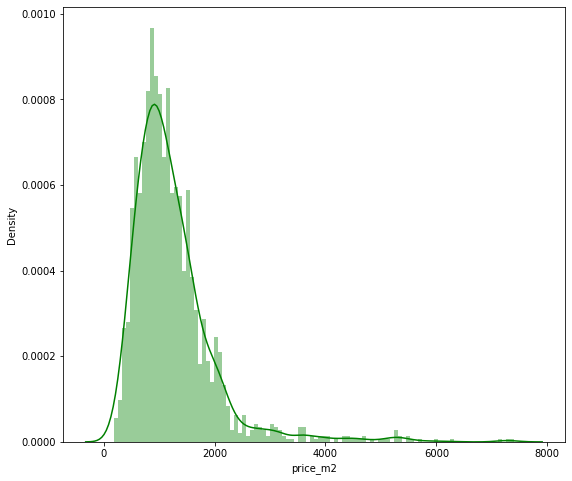

In [275]:
CheckDistribution(prepared_data,'price_m2')

In [276]:
CheckNormality(prepared_data,'price_m2')

Shapiro stat: 0.7667151093482971
P-value:  0.0
Non-Normal Distribution


- With this information we can see that the prices are skewed right and some outliers lies above ~8000. 
- Also, based on the normality test result, it is proven that the target variable isn't normally distributed. 
- Eventually we would like to get rid of extreme values so that the fit of the model will be better. 
- One way to go is to apply the log of the price_m2, so that the feature will be then normally distributed.

2021-08-18 15:09:16,042 [13648] WARNING  py.warnings:110: [JupyterRequire] `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



count    1977.000000
mean        6.982192
std         0.521919
min         5.214936
25%         6.665684
50%         6.974479
75%         7.313887
max         8.909370
Name: log_price_m2, dtype: float64


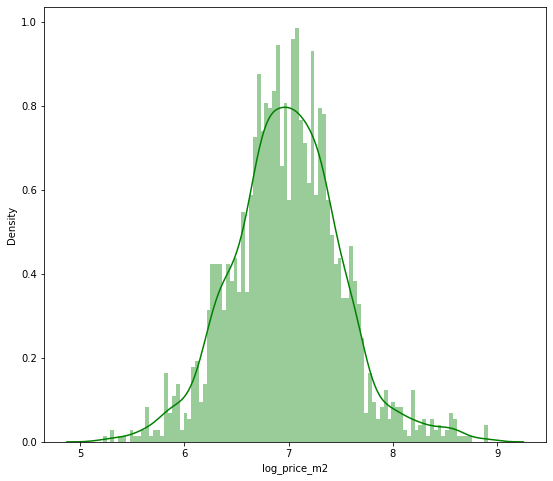

In [277]:
CheckDistribution(prepared_data,'log_price_m2')

In [279]:
CheckNormality(prepared_data,'log_price_m2')

Shapiro stat: 0.9920241832733154
P-value:  6.4773897356928956e-09
Non-Normal Distribution


Lets plot them all

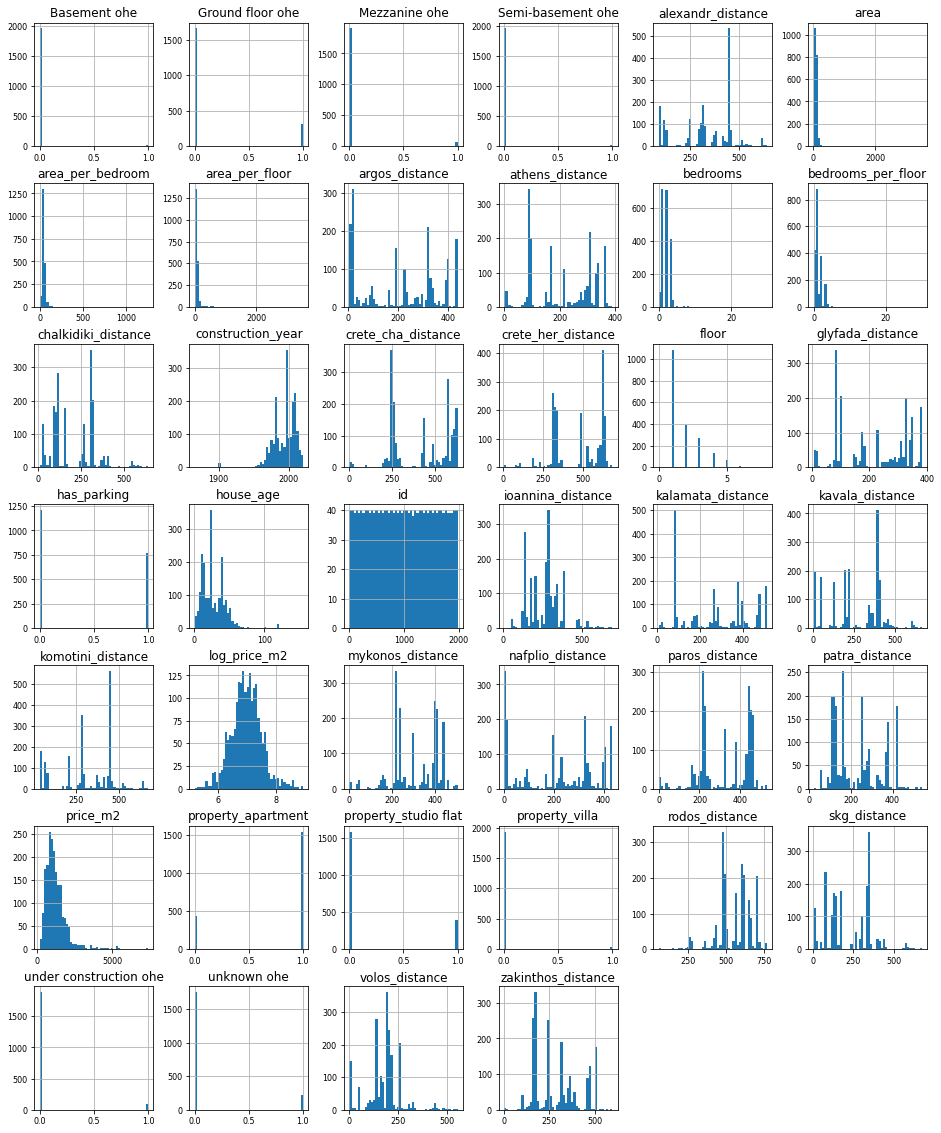

In [280]:
prepared_data_num.hist(figsize=(16, 20), bins=50, xlabelsize=8, ylabelsize=8); # ; avoid having the matplotlib verbose informations

### Correlation between features

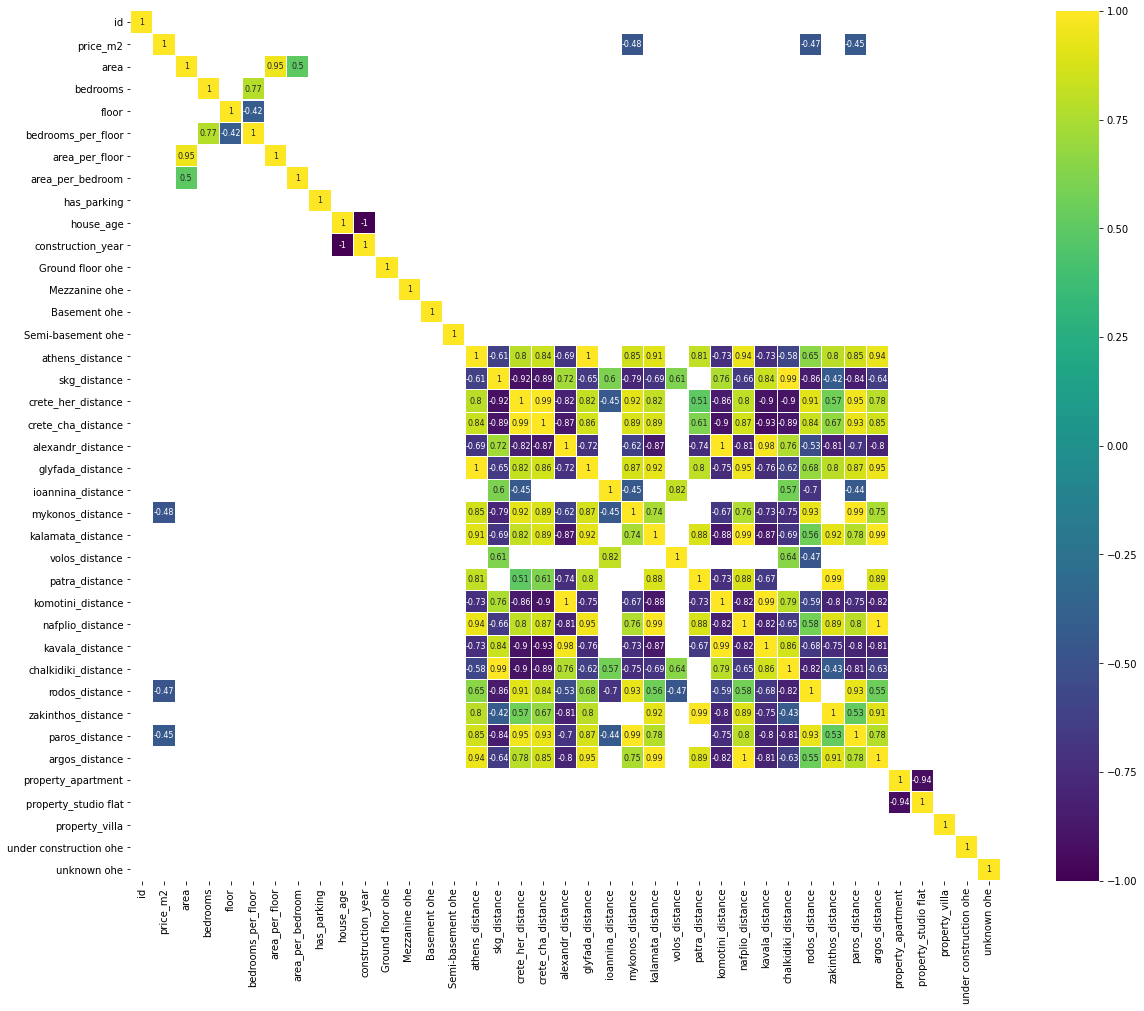

In [284]:
corr = prepared_data_num.drop('log_price_m2', axis=1).corr() # We already examined SalePrice correlations
plt.figure(figsize=(20, 16))

sns.heatmap(corr[(corr >= 0.5) | (corr <= -0.4)], 
            cmap='viridis', vmax=1.0, vmin=-1.0, linewidths=0.1,
            annot=True, annot_kws={"size": 8}, square=True);

Below we check correlation for every numeric variable with target from lowest to highest.

In [291]:
individual_features_df = []
for i in range(0, len(prepared_data_num.columns) - 3): # -1 because the last column is SalePrice
    tmpDf = prepared_data_num[[prepared_data_num.columns[i+3], 'log_price_m2']]
    tmpDf = tmpDf[tmpDf[prepared_data_num.columns[i+3]] != 0]
    individual_features_df.append(tmpDf)

all_correlations = {feature.columns[0]: feature.corr()['log_price_m2'][0] for feature in individual_features_df}
all_correlations = sorted(all_correlations.items(), key=operator.itemgetter(1))
for (key, value) in all_correlations:
    print("{:>15}: {:>15}".format(key, value))

mykonos_distance: -0.4832949700785792
 rodos_distance: -0.4739324563950729
 paros_distance: -0.4672971979092055
crete_her_distance: -0.4183900471954714
crete_cha_distance: -0.383907929639389
glyfada_distance: -0.34294629467966103
athens_distance: -0.33239479448394343
nafplio_distance: -0.26296365443180086
      house_age: -0.25887616880546893
kalamata_distance: -0.24992284392461353
 argos_distance: -0.24704695346814698
zakinthos_distance: -0.11000768706101707
 patra_distance: -0.08819861085468486
       bedrooms: -0.05136256335108458
bedrooms_per_floor: -0.04207170238423606
          floor: -0.026950710382884272
area_per_bedroom: -0.0038840494950615786
 area_per_floor: 0.01657636433651354
           area: 0.017158709519949248
    has_parking:             nan
construction_year: 0.258876168805469
Ground floor ohe:             nan
  Mezzanine ohe:             nan
   Basement ohe:             nan
Semi-basement ohe:             nan
 volos_distance: 0.17434739954569642
alexandr_distance: 0.2

### Numeric features vs Price m2

We will choose only features with high correlation (>30%) and plot against the target so that we can gain more insights.

In [292]:
corr_features_list = [key for key, value in all_correlations if abs(value) >= 0.3]
print("There is {} strongly correlated values with price_m2:\n{}".format(len(corr_features_list), corr_features_list))

There is 10 strongly correlated values with price_m2:
['mykonos_distance', 'rodos_distance', 'paros_distance', 'crete_her_distance', 'crete_cha_distance', 'glyfada_distance', 'athens_distance', 'ioannina_distance', 'chalkidiki_distance', 'skg_distance']


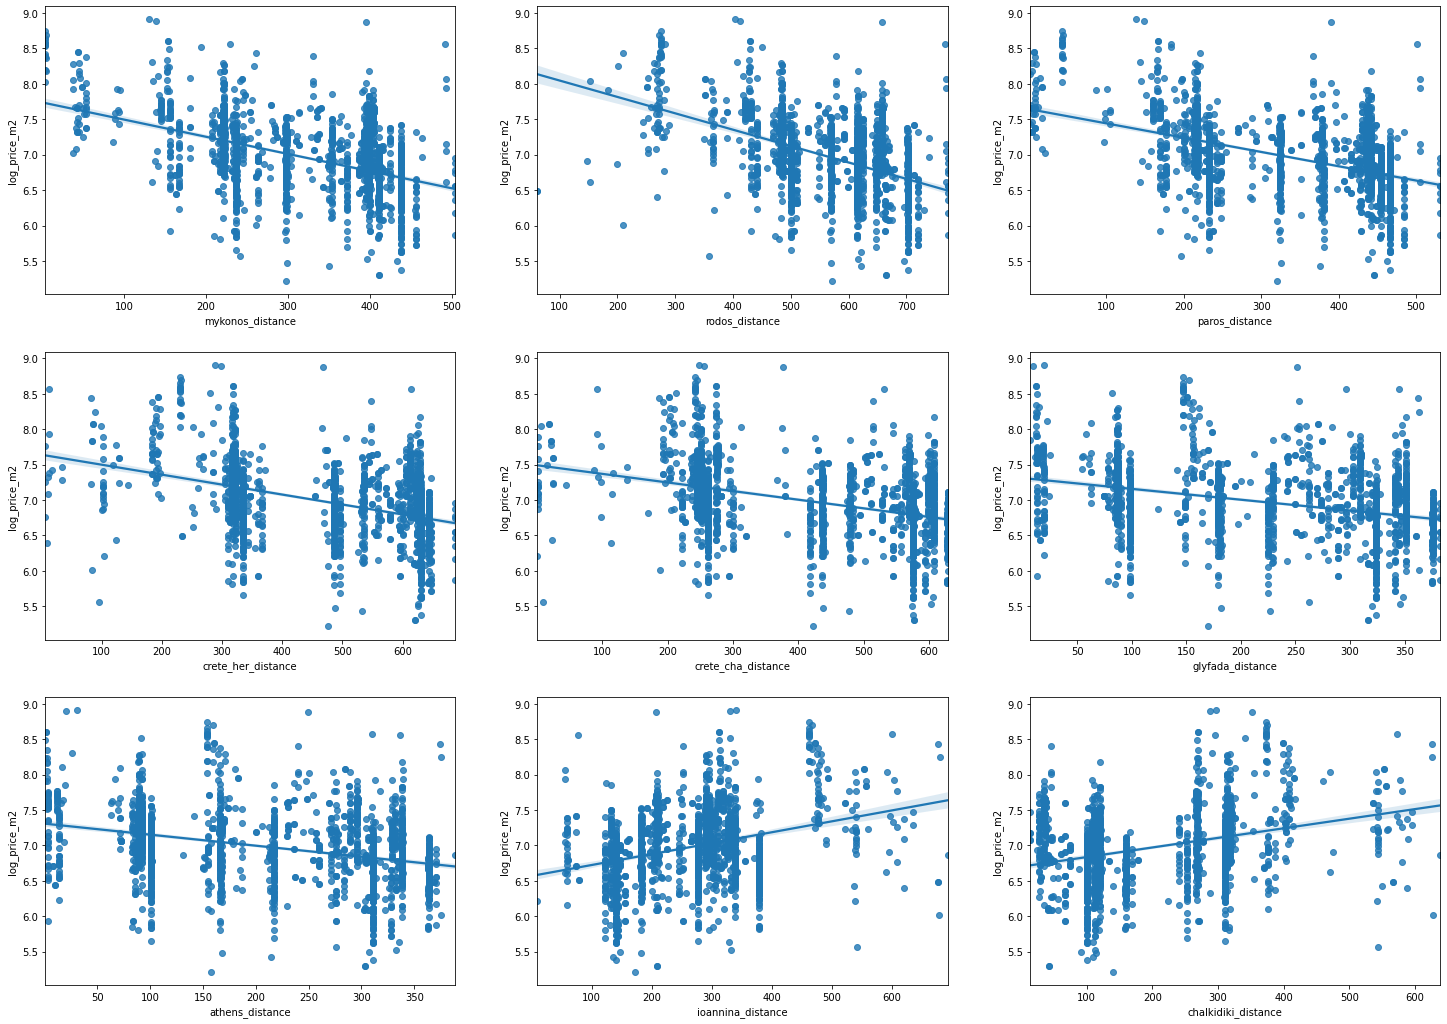

In [296]:
fig, ax = plt.subplots(round(len(corr_features_list) / 3), 3, figsize = (25, 18))

for i, ax in enumerate(fig.axes):
    if i < len(corr_features_list) - 1:
        sns.regplot(x=corr_features_list[i],y=prepared_data_num['log_price_m2'], data=prepared_data_num[corr_features_list], ax=ax)

### Categorical features vs Price m2

Text(0.5, 1.0, 'Basement & Price')

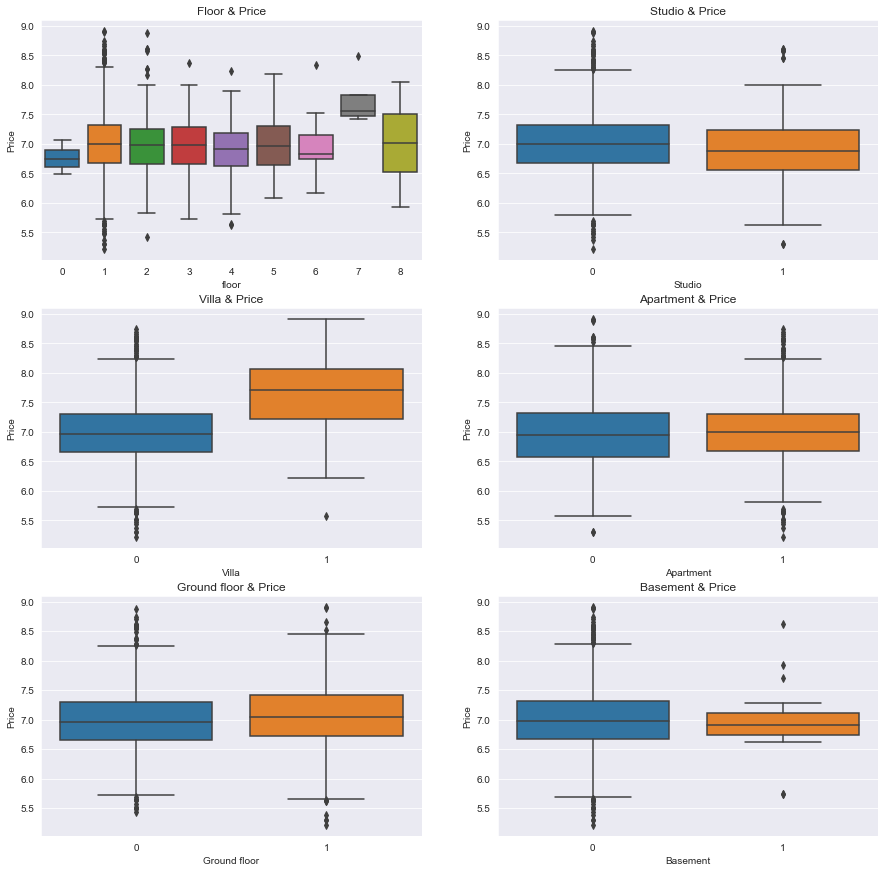

In [297]:
# Suplots of categorical features v price
sns.set_style('darkgrid')
f, axes = plt.subplots(3,2, figsize = (15,15))

# Plot [0,0]
sns.boxplot(data = prepared_data, x = 'floor', y = 'log_price_m2', ax = axes[0, 0])
axes[0,0].set_xlabel('floor')
axes[0,0].set_ylabel('Price')
axes[0,0].set_title('Floor & Price')

# Plot [0,1]
sns.boxplot(data = prepared_data, x = 'property_studio flat', y = 'log_price_m2', ax = axes[0, 1])
axes[0,1].set_xlabel('Studio')
axes[0,1].set_ylabel('Price')
axes[0,1].set_title('Studio & Price')

# Plot [1,0]
sns.boxplot(x = 'property_villa', y = 'log_price_m2', data = prepared_data, ax = axes[1,0])
axes[1,0].set_xlabel('Villa')
axes[1,0].set_ylabel('Price')
axes[1,0].set_title('Villa & Price')

# Plot [1,1]
sns.boxplot(x = 'property_apartment', y = 'log_price_m2', data = prepared_data, ax = axes[1,1])
axes[1,1].set_xlabel('Apartment')
axes[1,1].set_ylabel('Price')
axes[1,1].set_title('Apartment & Price')

# Plot [2,0]
sns.boxplot(x = 'Ground floor ohe', y = 'log_price_m2', data = prepared_data, ax = axes[2,0])
axes[2,0].set_xlabel('Ground floor')
axes[2,0].set_ylabel('Price')
axes[2,0].set_title('Ground floor & Price')

# Plot [2,1]
sns.boxplot(x = 'Basement ohe', y = 'log_price_m2', data = prepared_data, ax = axes[2,1])
axes[2,1].set_xlabel('Basement')
axes[2,1].set_ylabel('Price')
axes[2,1].set_title('Basement & Price')

- We observe that greater the number of rooms, greater is the price of the house and also if there are 7 number of rooms the price gets significantly higher.
- Villas have significantly higher prices
- Houses with basement have lower range in price compared to houses with no basement.

### Plot locations in a map

- Most of houses are located in Peloponnisos and especially around Nafplio area, then there is a big concentration in Eastern Macedonia around Xanthi and Kavala area.
- Also we can observe number of houses in Volos and Larissa area as well as in Thessaloniki.

In [300]:
prepared_data['latitude'] = prepared_data['latitude'].astype(float)
prepared_data['longitude'] = prepared_data['longitude'].astype(float)
# Create the map
m_3 = folium.Map(location=[40.93605,24.413038], tiles='cartodbpositron', zoom_start=13)

# Add points to the map
mc = MarkerCluster()
for idx, row in prepared_data.iterrows():
    if not math.isnan(row['longitude']) and not math.isnan(row['latitude']):
        mc.add_child(Marker([row['latitude'], row['longitude']]))
m_3.add_child(mc)

# Display the map
m_3

## Import, Clean, Transform Dataset

Over the following flow we load data, clean, manipulate, feature engineer, choose subset of variables and create a dataset ready to produce a machine learning model.

In [155]:
#Load data
asking_data = LoadData(path,'asking_data')
greek_localities = LoadData(path,'greek_localities')
#Clean and Prepare data
greek_localities = CleanGreekLocalities(greek_localities)
prepared_data = Data_Preparation(asking_data)
prepared_data = ChooseColumns(prepared_data)
#Variable Selection
prepared_data_best = variableselection_continuous(prepared_data,28,'log_price_m2',20)
#keep those features only
feat_list= list(prepared_data_best.columns)
# Split train test
x_train, x_test, y_train, y_test = ModelCreation(prepared_data,0.1,'log_price_m2',feat_list)


Data is loaded!
Data:  1979 observations, and  13 features
Data is loaded!
Data:  208 observations, and  2 features


2021-08-17 19:58:52,938 [13648] WARNING  py.warnings:110: [JupyterRequire] C:\Users\Nikitas\AppData\Roaming\Python\Python37\site-packages\sklearn\preprocessing\data.py:323: DataConversionWarning:

Data with input dtype uint8, int32, int64, float64 were all converted to float64 by MinMaxScaler.




Creating OHE features..
Old df shape:(1979, 45)
New df shape:(1979, 47)
New df has length: 
1977
Total Time for Data Preparation is: 
0.7086842219034831
Remove Zero Variance Features..
Remove Missing..
Pearson Correlation..
RFE selector..
Fitting estimator with 37 features.
20 selected features
Light GBM ..
12 selected features
['volos_distance', 'kalamata_distance', 'house_age', 'crete_her_distance', 'construction_year', 'skg_distance', 'rodos_distance', 'paros_distance', 'nafplio_distance', 'mykonos_distance', 'komotini_distance', 'kavala_distance', 'glyfada_distance', 'crete_cha_distance', 'chalkidiki_distance', 'bedrooms_per_floor', 'argos_distance', 'alexandr_distance', 'zakinthos_distance', 'property_villa', 'property_studio flat', 'property_apartment', 'patra_distance', 'ioannina_distance', 'has_parking', 'athens_distance', 'area_per_floor', 'area_per_bedroom']
Removed Columns {'komotini_distance', 'kavala_distance', 'nafplio_distance', 'mykonos_distance', 'paros_distance', 'ale

## Compare models and choose best

In [189]:
'''We are interested in the following 13 regression models.
All initialized with default parameters except random_state and n_jobs.'''
linear = LinearRegression(n_jobs = -1)
lasso = Lasso(random_state = seed)
ridge = Ridge(random_state = seed)
elnt = ElasticNet(random_state = seed)
dt = DecisionTreeRegressor(random_state = seed)
svm = SVR()
knn = KNeighborsRegressor(n_jobs = -1)
rf =  RandomForestRegressor(n_jobs = -1, random_state = seed)
et = ExtraTreesRegressor(n_jobs = -1, random_state = seed)
ab = AdaBoostRegressor(random_state = seed)
gb = GradientBoostingRegressor(random_state = seed)
xgb = XGBRegressor(random_state = seed, n_jobs = -1)
lgb = LGBMRegressor(random_state = seed, n_jobs = -1)
'''Calculate train_test_split score of differnt models and plot them.'''
models = [linear,lasso, ridge, elnt, dt, svm, knn, rf, et, ab, gb, xgb, lgb]
train_test_split_rmse = []
for model in models:
    train_test_split_rmse.append(cv_results_print(model, x_train, y_train, 0.10,seed))


'''Plot data frame of train test rmse'''
train_test_score = pd.DataFrame(data = train_test_split_rmse, columns = ['Train_Test_RMSE','Train_Test_MAE'])
train_test_score.index = ['LN', 'LASS','RID', 'ELNT', 'DT', 'SVM', 'KNN', 'RF', 'ET', 'AB', 'GB', 'XGB', 'LGB']
train_test_score = train_test_score.round(5)
x = train_test_score.index
y = train_test_score['Train_Test_RMSE']
title = "Models' Test Score (RMSE) on Holdout(15%) Set"
scatter_plot(x, y, title, 'Models','RMSE', 25, 'RdBu')

Model: LinearRegression
Model Parameters: {'copy_X': True, 'fit_intercept': True, 'n_jobs': -1, 'normalize': False}
5 Fold CV RMSE: 0.4245
5 Fold CV MAE: 0.3176
Computation Time: 1.54
Model: Lasso
Model Parameters: {'alpha': 1.0, 'copy_X': True, 'fit_intercept': True, 'max_iter': 1000, 'normalize': False, 'positive': False, 'precompute': False, 'random_state': 1, 'selection': 'cyclic', 'tol': 0.0001, 'warm_start': False}
5 Fold CV RMSE: 0.5074
5 Fold CV MAE: 0.3953
Computation Time: 0.04
Model: Ridge
Model Parameters: {'alpha': 1.0, 'copy_X': True, 'fit_intercept': True, 'max_iter': None, 'normalize': False, 'random_state': 1, 'solver': 'auto', 'tol': 0.001}
5 Fold CV RMSE: 0.4244
5 Fold CV MAE: 0.3177
Computation Time: 0.03
Model: ElasticNet
Model Parameters: {'alpha': 1.0, 'copy_X': True, 'fit_intercept': True, 'l1_ratio': 0.5, 'max_iter': 1000, 'normalize': False, 'positive': False, 'precompute': False, 'random_state': 1, 'selection': 'cyclic', 'tol': 0.0001, 'warm_start': False}
5 

By comparing all models based on __RMSE__ (Root Mean Squared Error) we see that the best model is produced with __LightGBM__.

In [190]:
y = train_test_score['Train_Test_MAE']
title = "Models' Test Score (MAE) on Holdout(15%) Set"
scatter_plot(x, y, title, 'Models','MAE', 25, 'RdBu')

By comparing all models based on __MAE__ (Mean Absolute Error) we see that the best model is produced with Extra Trees Regressor algorithm.

### Chosen Features

- 11 features are chosen with an automatic way, first combining various methods and voting mechanism to chose __k__ best and then by removing highly collinear features greaten than 85%.
- There are four distance features measured in kilometers, from the repective four parts of Greece (Volos,Kalamata,Heraklion Crete,Ioannina).
- House age has the age of the house based on the feature construction_year.
- Bedrooms per floor, area per floor and area per bedroom are the ratios of the respective features from the original dataset floor,area and bedrooms.
- property villa and property studio flat are the one hot encoded features from the categorical variable prop_type.
- has parking is just the 0,1 version of the original has parking having True False values instead.

In [191]:
feat_list

['volos_distance',
 'kalamata_distance',
 'house_age',
 'crete_her_distance',
 'bedrooms_per_floor',
 'property_villa',
 'property_studio flat',
 'ioannina_distance',
 'has_parking',
 'area_per_floor',
 'area_per_bedroom']

Best model is LightGBM, so we will use hyperparameter tuning to find this space of parameters which produce the best possible fit for the data.

### Optimize Tuning for LightGBM model

In order to ensure that we produced the best possible version of lightgbm and have the fit that minimizes the residuals we need to search over the hyperparameter space and find those minima which accomplish this goal.

In [159]:
# Define searched space
hyper_space = {'objective': 'regression',
               'metric':'rmse',
               'boosting':'gbdt', 'gpu_device_id': 0,
               'n_estimators': hp.choice('n_estimators', [25, 40, 50, 75, 100, 250, 500]),
               'max_depth':  hp.choice('max_depth', list(range(6, 18, 2))),
               'num_leaves': hp.choice('num_leaves', list(range(20, 180, 20))),
               'subsample': hp.choice('subsample', [.7, .8, .9, 1]),
               'colsample_bytree': hp.uniform('colsample_bytree', 0.7, 1),
               'learning_rate': hp.uniform('learning_rate', 0.03, 0.12),
               'reg_alpha': hp.choice('reg_alpha', [.1, .2, .3, .4, .5, .6]),
               'reg_lambda':  hp.choice('reg_lambda', [.1, .2, .3, .4, .5, .6]),               
               'min_child_samples': hp.choice('min_child_samples', [20, 45, 70, 100])}

In [192]:
# Seting the number of Evals
MAX_EVALS= 10

def evaluate_metric(params):
    
    clf = LGBMRegressor(**params)
    cv = ShuffleSplit(n_splits=10, test_size=0.10, random_state=seed)
    score = cross_val_score(clf, x_train, y_train, cv=cv, scoring='neg_mean_squared_error')
    return {'loss':np.sqrt(-score).mean(), 'status':STATUS_OK}

# Fit Tree Parzen Estimator
best_vals = fmin(evaluate_metric, 
                 space=hyper_space,
                 verbose=-1,
                 algo=tpe.suggest, 
                 max_evals=MAX_EVALS)

# Print best parameters
best_params = space_eval(hyper_space, best_vals)

100%|██████████| 10/10 [00:16<00:00,  1.66s/trial, best loss: 0.31530781423949794]


Next we have the optimum hyperparameters based on the search in the hyperparameter space by iteratively fitting models and decide based on minimum rmse.

In [193]:
best_params

{'boosting': 'gbdt',
 'colsample_bytree': 0.7814511741918547,
 'gpu_device_id': 0,
 'learning_rate': 0.07923414076450319,
 'max_depth': 8,
 'metric': 'rmse',
 'min_child_samples': 20,
 'n_estimators': 500,
 'num_leaves': 160,
 'objective': 'regression',
 'reg_alpha': 0.6,
 'reg_lambda': 0.6,
 'subsample': 0.7}

In [194]:
clf_best = LGBMRegressor(**best_params)
clf_best.fit(x_train, y_train)
cv_results_print(clf_best, x_train, y_train,0.10,seed)

Model: LGBMRegressor
Model Parameters: {'boosting_type': 'gbdt', 'class_weight': None, 'colsample_bytree': 0.7814511741918547, 'importance_type': 'split', 'learning_rate': 0.07923414076450319, 'max_depth': 8, 'min_child_samples': 20, 'min_child_weight': 0.001, 'min_split_gain': 0.0, 'n_estimators': 500, 'n_jobs': -1, 'num_leaves': 160, 'objective': 'regression', 'random_state': None, 'reg_alpha': 0.6, 'reg_lambda': 0.6, 'silent': True, 'subsample': 0.7, 'subsample_for_bin': 200000, 'subsample_freq': 0, 'boosting': 'gbdt', 'gpu_device_id': 0, 'metric': 'rmse'}
5 Fold CV RMSE: 0.3153
5 Fold CV MAE: 0.2191
Computation Time: 2.25


(0.31530781423949794, 0.21913910536841077)

By checking the fit for chosen parameters we observe that better performance is achieved both for rmse and mae.

In [200]:
# predict the results
y_pred=clf_best.predict(x_test)

print(np.sqrt(mean_squared_error(y_test, y_pred)))
print(mean_absolute_error(y_test, y_pred))

y_pred_true = np.exp(y_pred)
y_test_true = np.exp(y_test)

print(np.sqrt(mean_squared_error(y_test_true, y_pred_true)))
print(mean_absolute_error(y_test_true, y_pred_true))

0.27520577184005646
0.19456268344456876
409.6913101659903
237.08464728443946


- Now we will check the performance upon the unknown observations which the model has not been trained upon. 
- These are 197 observations (10%) of total sample of data. We observe that performance is better than the cross validation on training data performance.
- We also check the line between true and predicted values. The closest the red points are to the blue line the better the fit.

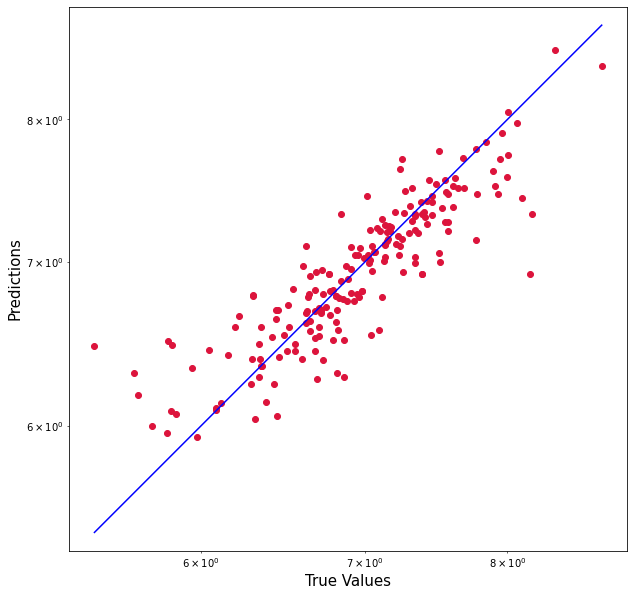

In [196]:
plt.figure(figsize=(10,10))
plt.scatter(y_test, y_pred, c='crimson')
plt.yscale('log')
plt.xscale('log')

p1 = max(max(y_pred), max(y_test))
p2 = min(min(y_pred), min(y_test))
plt.plot([p1, p2], [p1, p2], 'b-')
plt.xlabel('True Values', fontsize=15)
plt.ylabel('Predictions', fontsize=15)
plt.axis('equal')
plt.show()

We write into a dataframe the test sample to check the performance based on the __print_metrics.py__.

In [197]:
df_results = pd.DataFrame({'actual_price_m2':y_test_true, 'predicted_price_m2':y_pred_true})

In [198]:
df_results

actual_price_m2  predicted_price_m2
0             1139.0          689.248189
1              637.0          604.031136
2             1934.0         1426.971917
3             1304.0         1378.292022
4              384.0          564.127440
5             1121.0         1144.662442
6             1668.0         1410.020603
7              936.0          969.767101
8             3601.0         1514.725014
9              626.0          760.792097
10            6251.0         4499.413025
11             572.0          722.945415
12            1770.0         1857.441197
13             751.0          741.800843
14            2161.0         1807.905430
15            1388.0         1220.697953
16            1001.0         1042.847947
17             539.0          514.601212
18             939.0         1514.238327
19             572.0          572.260249
20            1185.0         1375.559186
21            1251.0         1405.000257
22            1501.0         1806.269731
23             888.0          912.299085
24             793.0          911.956421
25            1401.0         2227.781964
26             472.0          609.962381
27             632.0          801.800991
28            1376.0         1150.103215
29             228.0          643.786425
30             451.0          458.892583
31            1051.0          875.438708
32            1268.0         1338.157861
33             309.0          403.553606
34            3334.0         1683.905346
35             890.0          668.223183
36             351.0          430.763403
37             564.0          533.486535
38             751.0         1216.297249
39             770.0          705.255518
40            2001.0         1588.766630
41             491.0          725.413447
42             439.0          442.794440
43             542.0          594.918015
44            2032.0         1949.367944
45             341.0          439.358337
46             769.0          749.909999
47             910.0          877.766643
48            1088.0         1123.999435
49             552.0          419.206220
50            1608.0         1013.031131
51            4301.0         5104.077924
52            2367.0         1268.194165
53             869.0         1010.441668
54             910.0          880.298318
55             851.0          819.852232
56            1890.0         1433.361813
57             757.0          800.703916
58            1144.0         1031.757602
59            1629.0         1535.320851
60            1171.0         1168.162863
61            2369.0         2399.644013
62            1241.0         1100.155788
63             826.0          802.070764
64            1223.0          871.587378
65            1601.0         1638.435140
66            1223.0         1459.489162
67             630.0          427.247750
68             568.0          596.160969
69            1201.0          709.425239
70             668.0          626.527833
71             439.0          446.390314
72            1001.0          893.176727
73             734.0          595.822701
74            1539.0         1354.337161
75            1934.0         1346.875565
76            2990.0         3142.430454
77            1287.0         1393.519288
78            1020.0          850.749306
79            1276.0         1276.485304
80            1381.0         2079.286400
81            1348.0         1233.106020
82            1251.0         1133.218690
83            1529.0         1493.635036
84            2144.0         2249.416263
85             796.0          799.109555
86            1251.0         1223.755015
87             948.0          861.133418
88            1291.0         1346.839280
89            1430.0         1777.423638
90            1478.0         1602.058740
91            1267.0         1260.806594
92            2858.0         2694.118673
93            1072.0          905.360806
94             906.0          748.300019
95            1726.0         1641.090420
96            1720.0        

In [199]:
df_results.to_csv('C:/Users/Nikitas/Desktop/Nikitas/other_pet_projects/recognyte/df_results.csv', index=False)

In [209]:
#create df so that we can observe features names too
x_test_df = pd.DataFrame(x_test,columns=feat_list)
%time shap_values = shap.TreeExplainer(clf_best).shap_values(x_test_df)

Wall time: 2.03 s


In [1]:
import shap
%time shap_values = shap.TreeExplainer(clf_best).shap_values(x_test)

NameError: name 'shap' is not defined

## Explain Machine Learning Model

### Feature Importance

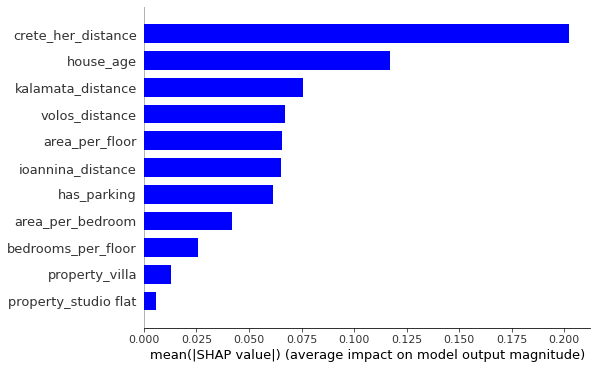

In [229]:
shap.summary_plot(shap_values, x_test_df, plot_type="bar", color='blue')

This feature importance representation shows how if we color each dot by the value of the original feature we can see how a low feature value or high feature value effects the model output.
For example __crete_her_distance__ is the most important feature and it seems that low values (blue colored dots) have higher shap values whereas higher values have lower shap values. This can be translated that places near Crete have higher prices whereas places away from crete have lower. Some features may not have a global impact like __property_villa__ but have a significant high impact for a particular subset, which can be translated into that properties of type villa have significantly higher prices.

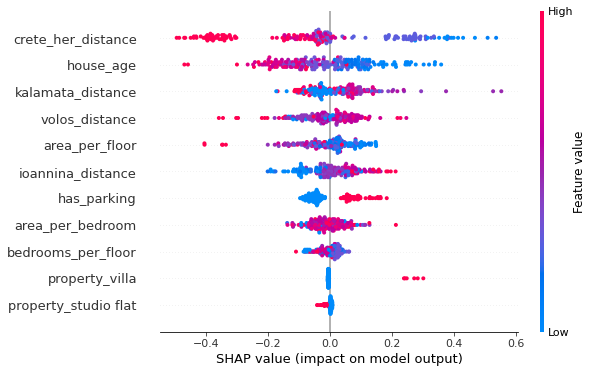

In [210]:
shap.summary_plot(shap_values, x_test_df)

### Feature patterns

Here you can scroll through the top features and see lots of interesting patterns and interactions. Like how newer houses have parking spots than older ones (see the house_age - has_parking plot).

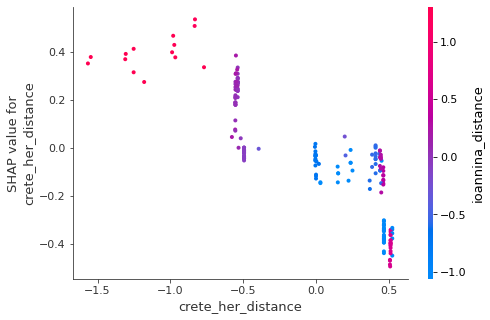

2021-08-18 11:13:30,277 [13648] WARNING  py.warnings:110: [JupyterRequire] Passing parameters norm and vmin/vmax simultaneously is deprecated since 3.3 and will become an error two minor releases later. Please pass vmin/vmax directly to the norm when creating it.



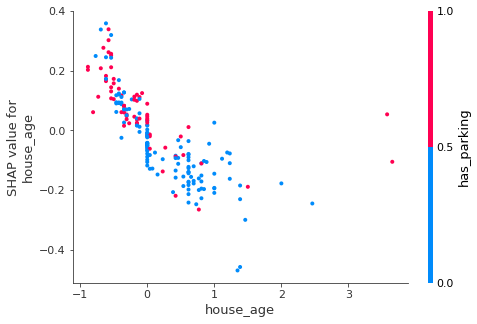

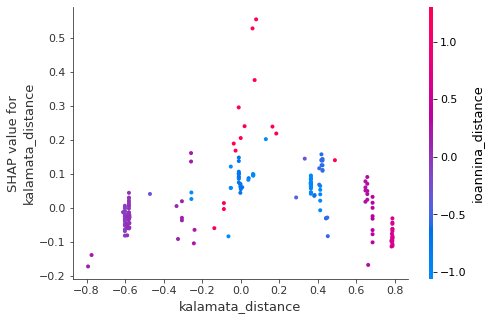

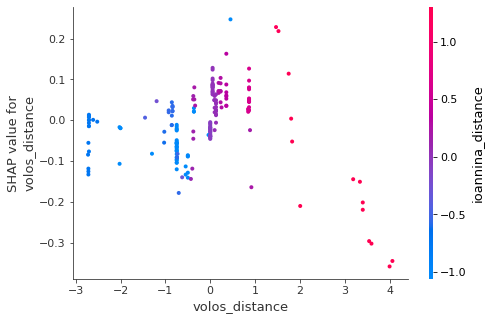

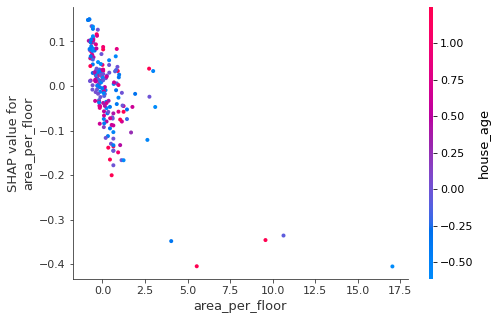

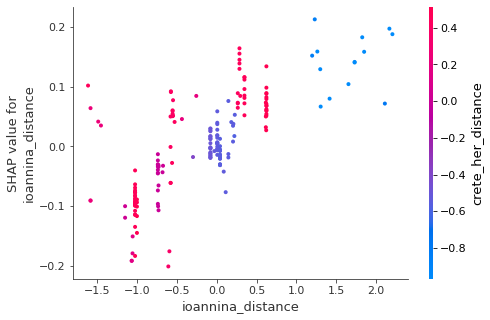

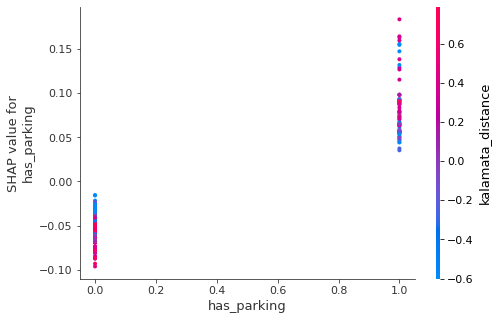

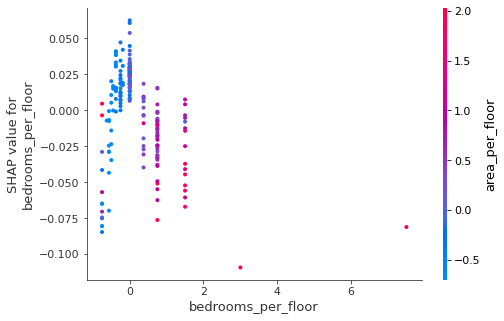

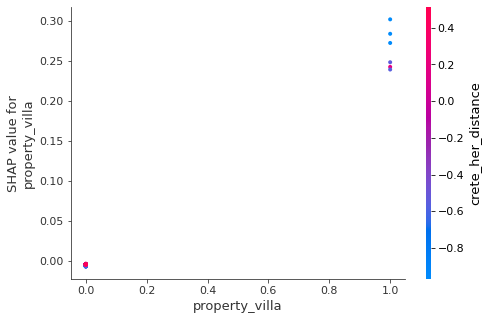

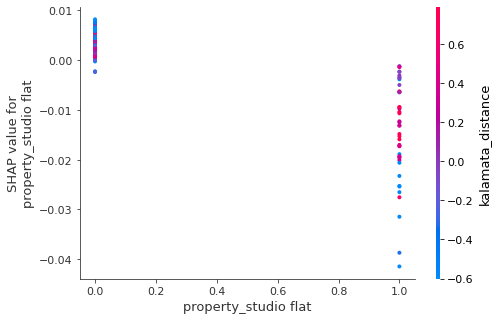

In [220]:
for i in reversed(inds2):
    shap.dependence_plot(i, shap_values, x_test_df)

Features pushing the prediction higher than the base value are shown in red, those pushing the prediction lower are in blue.

### Explain example

In [247]:

explainer = shap.TreeExplainer(clf_best)
shap.force_plot(explainer.expected_value, shap_values[3,:], x_test_df.iloc[3,:])

#### Original example

In [255]:
asking_data[asking_data['Unnamed: 0'] == 351]

Unnamed: 0    price price_m2  area  prop_type        lat        lng  \
351         351  99000.0   1303.0  76.0  Apartment  39.327553  23.014614   

          location bedrooms floor has_parking construction_year   geohash  
351  Center, Agria        2     2       FALSE              2010  swbrur30

#### After data manipulation

In [252]:
prepared_data[prepared_data['log_price_m2'] == y_test[3]]

id  log_price_m2  area  bedrooms  floor  bedrooms_per_floor  \
351  351      7.173192  76.0         2      2                 1.0   

     area_per_floor  area_per_bedroom  has_parking  house_age  \
351            38.0              38.0            0       11.0   

     construction_year  Ground floor ohe  Mezzanine ohe  Basement ohe  \
351             2010.0                 0              0             0   

     Semi-basement ohe  athens_distance  skg_distance  crete_her_distance  \
351                  0       165.203419     139.93496          484.571712   

     crete_cha_distance  alexandr_distance  glyfada_distance  \
351          436.744826         292.439984        178.393628   

     ioannina_distance  mykonos_distance  kalamata_distance  volos_distance  \
351         190.806657        293.536328         271.501285        9.204667   

     patra_distance  komotini_distance  nafplio_distance  kavala_distance  \
351       168.62626         279.920694        201.155962       209.512475   

     chalkidiki_distance  rodos_distance  zakinthos_distance  paros_distance  \
351           112.862839      563.280032          256.270162       320.67981   

     argos_distance  property_apartment  property_studio flat  property_villa  \
351      193.852685                   1                     0               0   

     under construction ohe  unknown ohe  
351                       0            0